In [69]:
import os
import shutil

import re
import kagglehub

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer

# Loading Dataset from Kaggle

In [ ]:
# path = kagglehub.dataset_download("amruthjithrajvr/recruitment-scam")
# print("Path to dataset files:", path)

# dest_folder = os.path.join(os.getcwd(), "recruitment-scam-dataset")

# if os.path.exists(dest_folder):
#     shutil.rmtree(dest_folder)

# shutil.copytree(path, dest_folder)

# print(f"Dataset copied to: {dest_folder}")

Path to dataset files: C:\Users\teomi\.cache\kagglehub\datasets\amruthjithrajvr\recruitment-scam\versions\3
Dataset copied to: c:\LocalOneDrive\Documents\Desktop\INTERNSHIPS\GovTech DS\GovTech_DS_GASP_Assessment\recruitment-scam-dataset


In [84]:
recruitment_df = pd.read_csv(os.path.join(os.getcwd(), "recruitment-scam-dataset", "DataSet.csv"))
recruitment_df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,<p>Vend is looking for some awesome new talent...,<p>Just in case this is the first time you’ve ...,<p>To ace this role you:</p>\r\n<ul>\r\n<li>Wi...,<p><b>What can you expect from us?</b></p>\r\n...,f,t,t,Full-time,Mid-Senior level,NaN,Computer Software,Sales,f,f
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,<p>WebLinc is the e-commerce platform and serv...,<p></p>\r\n<p>The Payroll Accountant will focu...,<p></p>\r\n<p>- B.A. or B.S. in Accounting</p>...,<p></p>\r\n<h3>Health &amp; Wellness</h3>\r\n<...,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,f,f
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,<p>We Provide Full Time Permanent Positions fo...,<p>Experienced Project Cost Control Staff Engi...,<ul>\r\n<li>At least 12 years professional exp...,NaN,f,f,f,Full-time,NaN,NaN,NaN,NaN,f,f
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,<p>Nemsia Studios is looking for an experience...,<p>1. Must be fluent in the latest versions of...,<p>Competitive salary (compensation will be ba...,f,f,t,Contract,Not Applicable,Professional,Graphic Design,Design,f,f


# 1. Exploratory Analysis

## 1A. Quality, Structure and Limitations of Dataset

In [52]:
recruitment_df.describe()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
count,17880,17534,6333,2868,14572,17880,15191,10684,17880,17880,17880,14409,10830,9775,12977,11425,17880,17880
unique,11231,3105,1337,874,1710,15095,12119,6510,2,2,2,5,7,13,131,37,2,2
top,English Teacher Abroad,"GB, LND, London",Sales,0-0,<p>We help teachers get safe &amp; secure jobs...,"<p>Play with kids, get paid for it </p>\r\n<p>...",<p>University degree required. TEFL / TESOL / ...,<p>See job description</p>,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,f,f
freq,311,718,551,142,726,376,410,726,17113,14220,9088,11620,3809,5145,1734,1749,17014,16980


In [53]:
recruitment_df['telecommuting'].value_counts(), recruitment_df['has_company_logo'].value_counts(), recruitment_df['fraudulent'].value_counts()

(telecommuting
 f    17113
 t      767
 Name: count, dtype: int64,
 has_company_logo
 t    14220
 f     3660
 Name: count, dtype: int64,
 fraudulent
 f    17014
 t      866
 Name: count, dtype: int64)

In [54]:
recruitment_df['employment_type'].unique(), recruitment_df['required_experience'].unique(), recruitment_df['required_education'].unique(), recruitment_df['location'].unique()

(array(['Other', 'Full-time', nan, 'Part-time', 'Contract', 'Temporary'],
       dtype=object),
 array(['Internship', 'Not Applicable', nan, 'Mid-Senior level',
        'Associate', 'Entry level', 'Executive', 'Director'], dtype=object),
 array([nan, "Bachelor's Degree", "Master's Degree",
        'High School or equivalent', 'Unspecified',
        'Some College Coursework Completed', 'Vocational', 'Certification',
        'Associate Degree', 'Professional', 'Doctorate',
        'Some High School Coursework', 'Vocational - Degree',
        'Vocational - HS Diploma'], dtype=object),
 array(['US, NY, New York', 'NZ, , Auckland', 'US, IA, Wever', ...,
        'US, CA, los Angeles', 'CA, , Ottawa', 'GB, WSX, Chichester'],
       shape=(3106,), dtype=object))

The dataset provided is a labeled dataset, and for most binary columns (e.g. `telecommuting`, `has_company_logo`, `fradulent`) the values make sense i.e. there are 2 unique values - either 't' or 'f'. For categorical variables (e.g. `location`, `employment_type`, `required_experience` and `required_education`), the dataset has been cleaned and pre-processed well with unique values that have been formatted without duplicate entries across different cases.

In [55]:
recruitment_df.isnull().sum()

title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                0
requirements            2689
benefits                7196
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
in_balanced_dataset        0
dtype: int64

For columns like `department` and `salary_range` where more than 70% of rows are null values, they are less useful as features for identifying fraudulent job advertisements. For other columns like `company_profile`and `requirements`, despite having null values as well, the presence of null values might be a useful signal for fraudulent job advertisements since fraudulent job advertisements often do not have an associated company profile.

In [56]:
recruitment_df.duplicated().sum()

np.int64(235)

There are a few duplicated rows in the dataset, of which repeated advertisements could be characteristic of fraudulent job advertisements. Hence, we do not remove these rows.

In [57]:
print(f"There are {len(recruitment_df[recruitment_df['fraudulent'] == 't'])} fraudulent job postings and {len(recruitment_df[recruitment_df['fraudulent'] == 'f'])} non-fraudulent job postings.")
print("This is a highly imbalanced dataset with less than 5% of job postings being fraudulent, which is common in fraud detection tasks.")

There are 866 fraudulent job postings and 17014 non-fraudulent job postings.
This is a highly imbalanced dataset with less than 5% of job postings being fraudulent, which is common in fraud detection tasks.


For most fraud detection datasets, the natural dataset is usually highly imbalanced. In this case, fraudulent job postings are rare. In the dataset, there is a `in_balanced_dataset` column that indicates that there are 900 rows belonging to the balanced dataset which was tagged by the dataset creator. We overcome this limitation of an imbalanced data set with our own balancing strategy where we use a model-based balancing approach.

## 1B. Useful Features for Identifying Fraudulent Job Advertisements

Based on intuition, some useful features of this dataset for fraud detection include:
1. `company_profile` -> non-fraudulent job advertisements are likely to include company profiles to establish credibility, hence we can explore the relationship between missing company profiles or short company profiles with whether the job advertisements are fraudulent or not;
2. `description` -> fraudulent job advertisements are likely to have vague job descriptions and are hence shorter, use consecutive punctuations or use language that over-promise;
3. `requirements` -> non-fraudulent job descriptions tend to have more detailed requirements while fraudulent ones tend to have vague requirements;
4. `benefits` -> fraudulent job descriptions tend to use language that promise unusually high renumeration;
5. `has_company_logo` -> established companies are more likely to have a company logo;
6. `has_questions` -> fraudulent job advertisements are unlikely to have screening questions;
7. `employment_type` -> fraudulent job advertisements are likely to be part-time/freelance arrangements because these positions require less vigorous vetting;
8. `required_experience` and `required_education` -> fraudulent job advertisements are likely to require minimal experience and education attainment because these advertisements are meant to target a wider audience and have lower barriers to entry for higher probability of successful scams

We begin by exploring some of these features.

## 1C. Identifying patterns, behaviours and signals through EDA

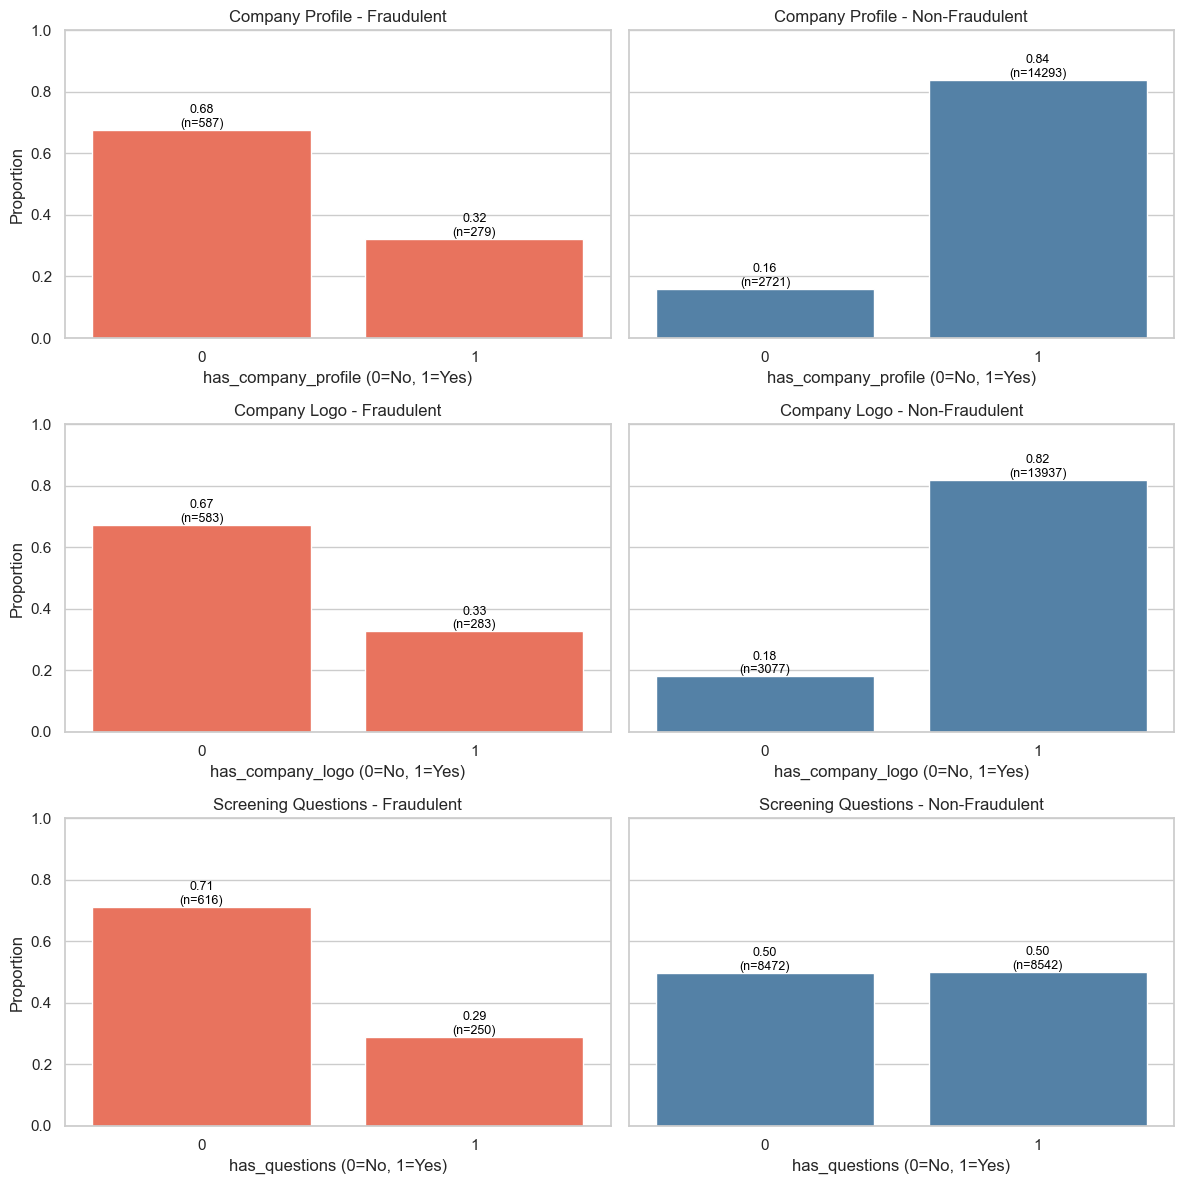

In [ ]:
# Prepare binary features
recruitment_df['has_company_profile'] = recruitment_df['company_profile'].notnull().astype(int)

binary_map = {'t': 1, 'f': 0}
recruitment_df['has_company_logo'] = recruitment_df['has_company_logo'].map(binary_map)
recruitment_df['has_questions'] = recruitment_df['has_questions'].map(binary_map)

fraud_map = {'t': 1, 'f': 0, 1: 1, 0: 0}
recruitment_df['fraudulent_bin'] = recruitment_df['fraudulent'].map(fraud_map)

# Features to plot
features = ['has_company_profile', 'has_company_logo', 'has_questions']
titles = {'has_company_profile': "Company Profile",
          'has_company_logo': "Company Logo",
          'has_questions': "Screening Questions"}

fig, axes = plt.subplots(len(features), 2, figsize=(12, 12), sharey=True)

colors = {1: "tomato", 0: "steelblue"}

for row, feature in enumerate(features):
    # Group counts
    counts = (
        recruitment_df
        .groupby(['fraudulent_bin', feature])
        .size()
        .reset_index(name='count')
    )
    # Compute proportions
    counts['proportion'] = counts.groupby('fraudulent_bin')['count'].transform(lambda x: x / x.sum())
    
    for col, fraud_status in enumerate([1, 0]):  # Fraud, Non-Fraud
        subset = counts[counts['fraudulent_bin'] == fraud_status]
        
        sns.barplot(x=feature, y="proportion", data=subset, ax=axes[row, col],
                    color=colors[fraud_status])
        
        axes[row, col].set_title(f"{titles[feature]} - {'Fraudulent' if fraud_status==1 else 'Non-Fraudulent'}")
        axes[row, col].set_xlabel(f"{feature} (0=No, 1=Yes)")
        axes[row, col].set_ylabel("Proportion")
        axes[row, col].set_ylim(0, 1)
        
        # Add proportion + raw count
        for p, count_val in zip(axes[row, col].patches, subset['count']):
            axes[row, col].annotate(f"{p.get_height():.2f}\n(n={count_val})",
                                    (p.get_x() + p.get_width()/2., p.get_height()),
                                    ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()

From the barplots for the binary variables `has_company_logo`, `has_questions` and `has_company_profile`, we can see that among fraudulent job advertisements, majority do not have a company logo, questions and an accompanying company profile has lower fraudulent rate than companies without. This is a signal that these variables might provide strong discriminatory power for identification of fraudulent job advertisements. 

We continue to look further into other categorical variables.

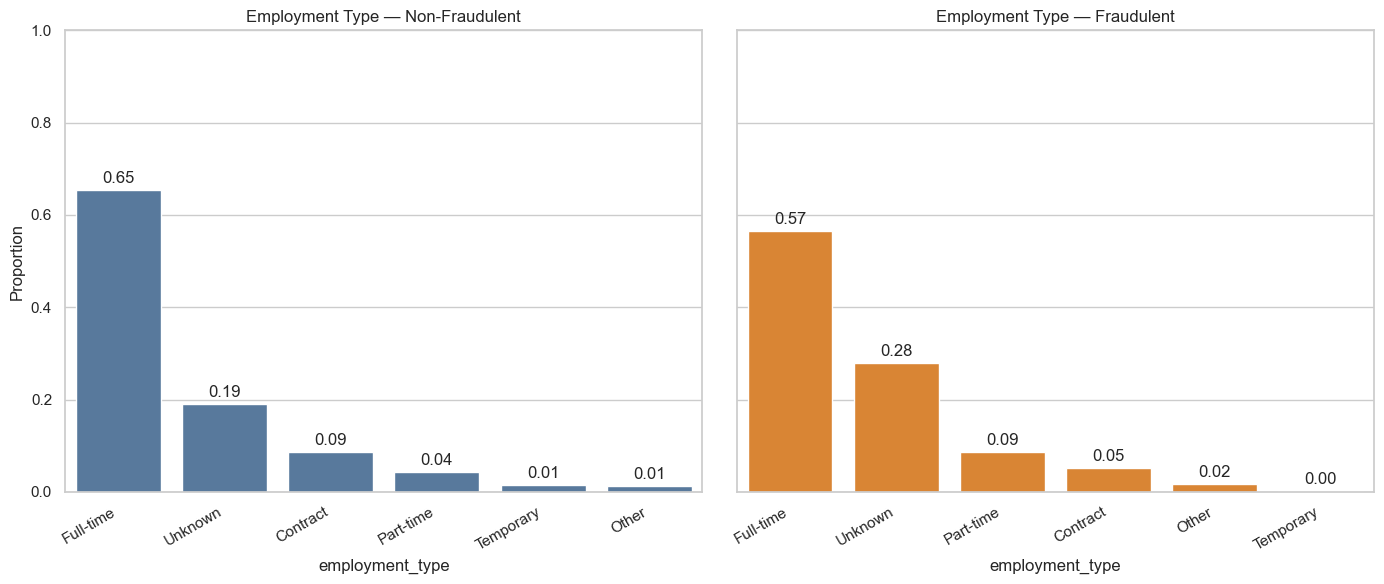

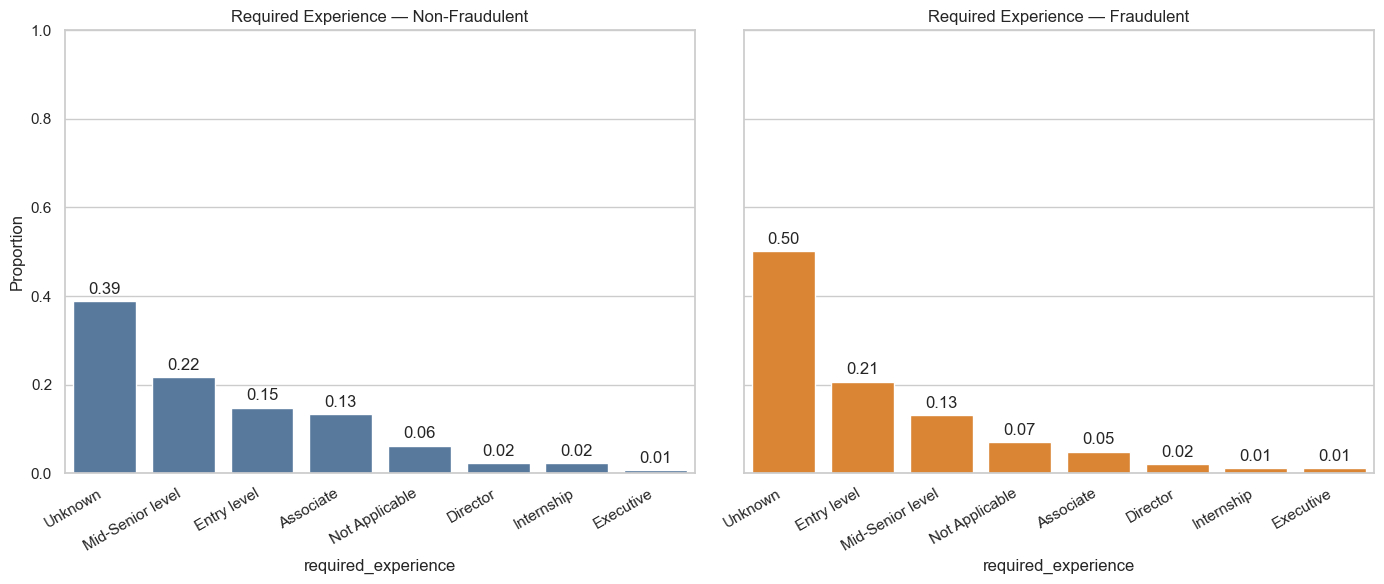

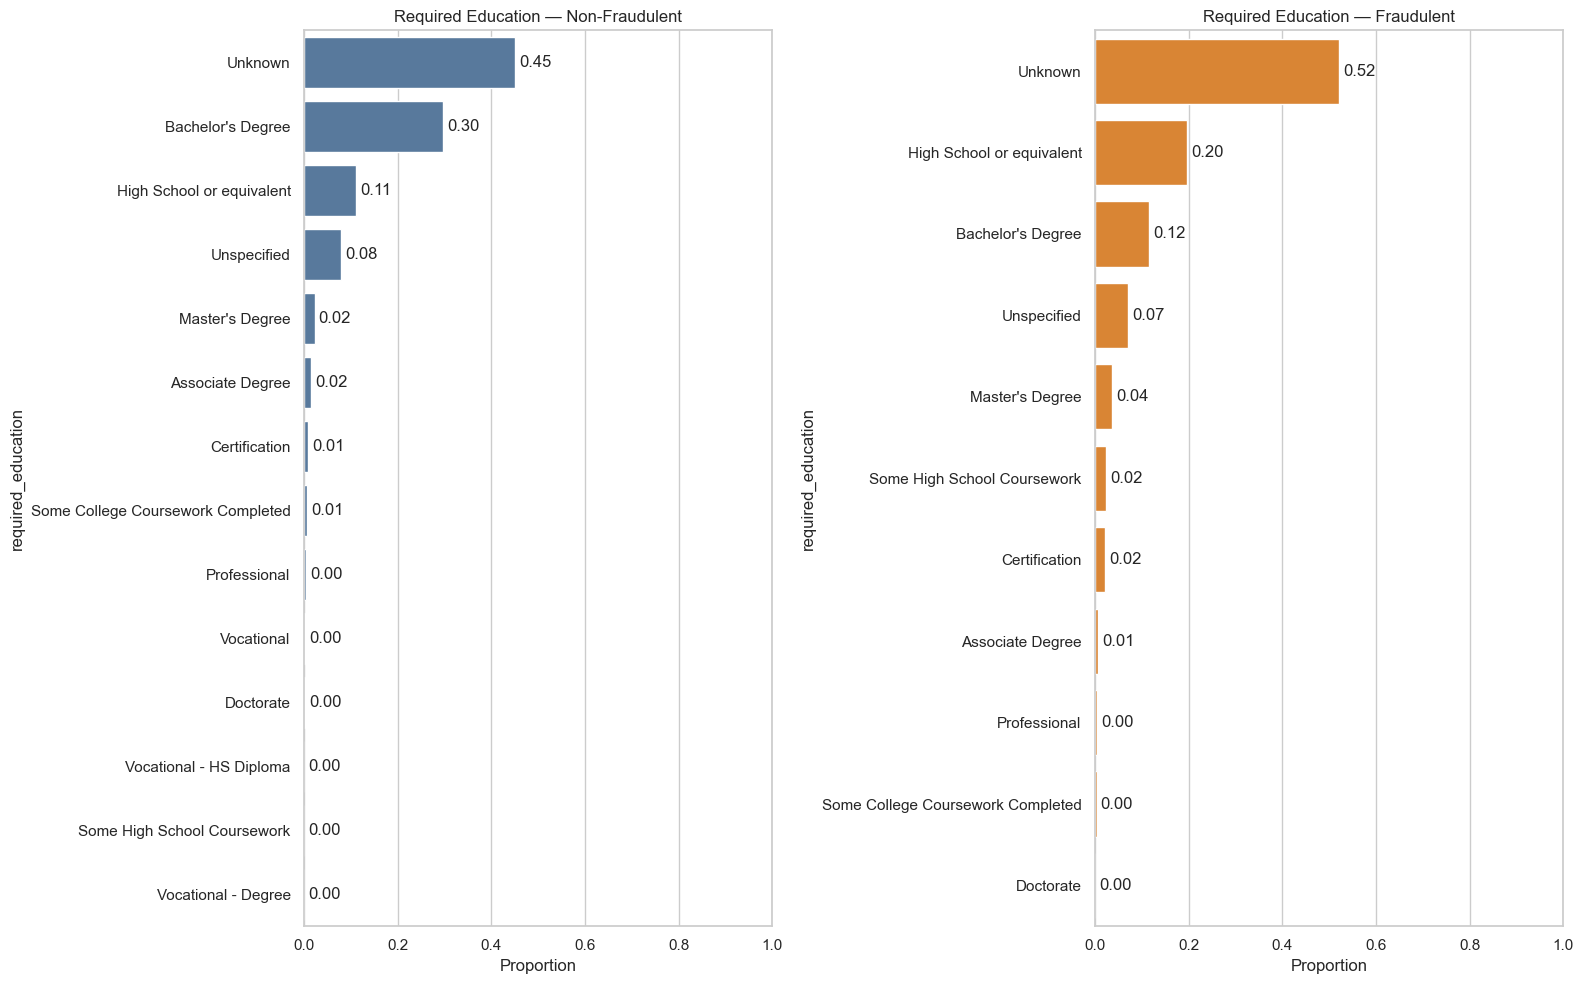

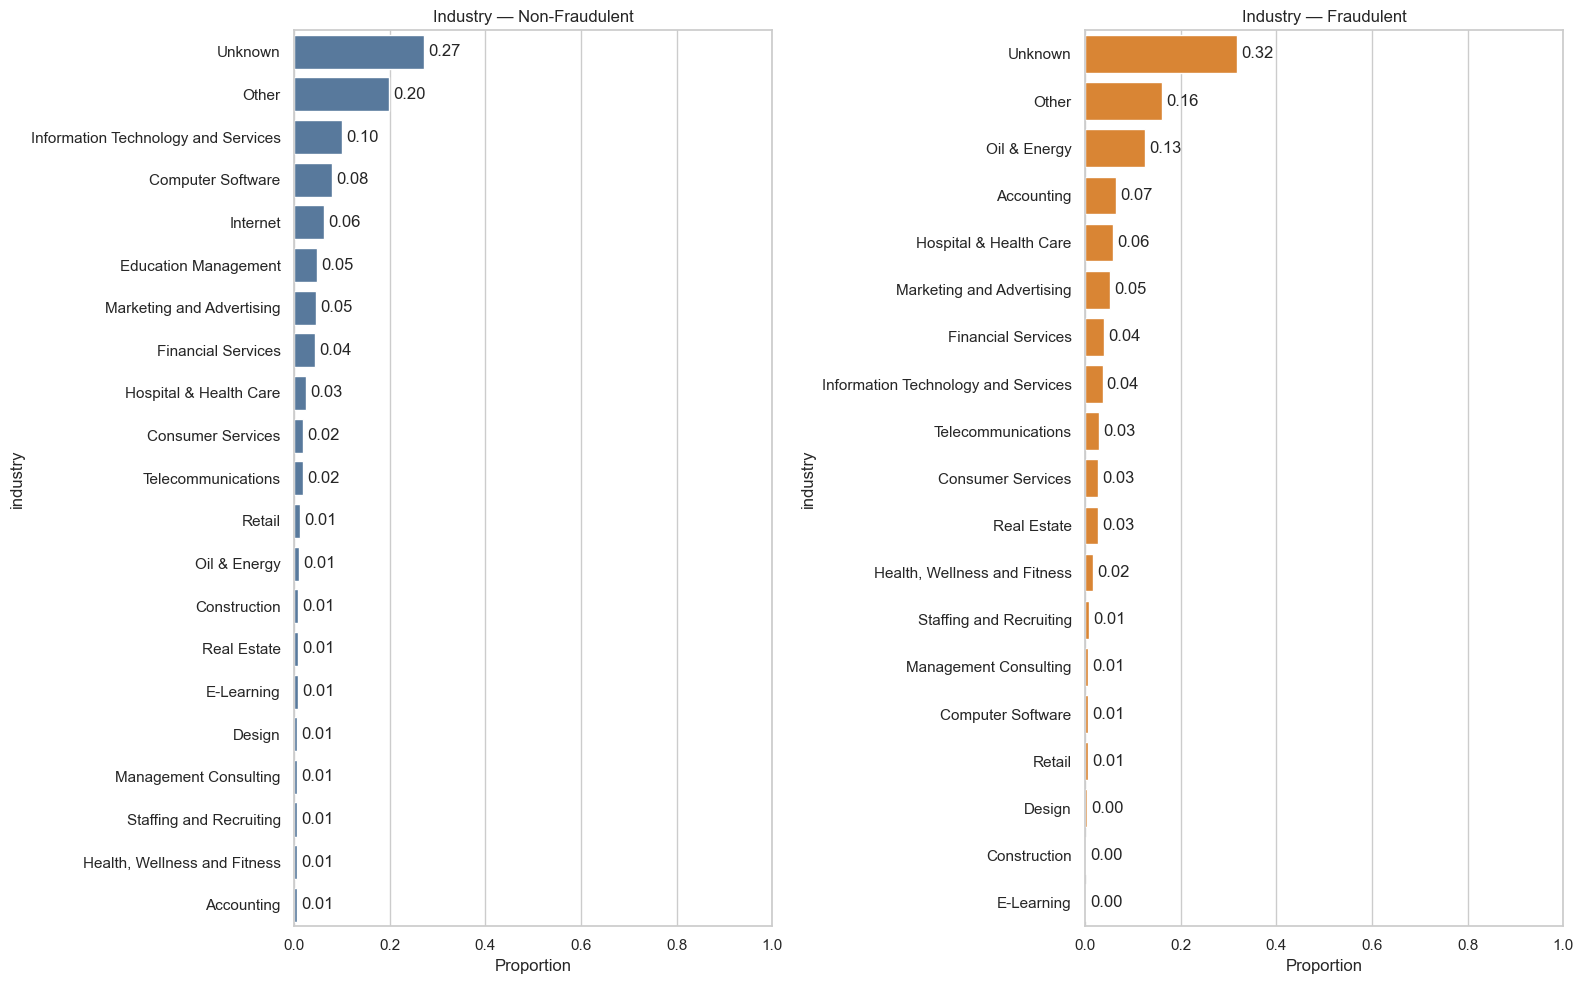

In [ ]:
sns.set(style="whitegrid")

def _prep_prop(df, target_col, cat_col, top_n=None):
    d = df.copy()
    d[target_col] = d[target_col].replace({1: "Fraudulent", 0: "Non-Fraudulent",
                                           "t": "Fraudulent", "f": "Non-Fraudulent"})
    d[cat_col] = d[cat_col].fillna("Unknown")

    # If top_n is set, collapse less frequent categories
    if top_n:
        top_categories = d[cat_col].value_counts().nlargest(top_n).index
        d[cat_col] = d[cat_col].where(d[cat_col].isin(top_categories), other="Other")

    nonfraud = (d[d[target_col] == "Non-Fraudulent"][cat_col]
                .value_counts(normalize=True)
                .rename_axis(cat_col).reset_index(name="Proportion"))
    fraud = (d[d[target_col] == "Fraudulent"][cat_col]
             .value_counts(normalize=True)
             .rename_axis(cat_col).reset_index(name="Proportion"))
    return nonfraud, fraud

def _plot_categorical_comparison(nonfraud, fraud, cat_col, title_prefix, 
                               orientation="vertical", figsize=(14, 6)):
    # Sort data for better readability
    if orientation == "horizontal":
        nonfraud = nonfraud.sort_values("Proportion", ascending=False)
        fraud = fraud.sort_values("Proportion", ascending=False)
        sharex, sharey = True, False
    else:
        sharex, sharey = False, True
    
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharex=sharex, sharey=sharey)
    
    # Determine plot parameters based on orientation
    if orientation == "vertical":
        plot_kwargs = {"x": cat_col, "y": "Proportion"}
        axes[0].set_xlabel(""); axes[0].set_ylabel("Proportion")
        axes[1].set_xlabel(""); axes[1].set_ylabel("")
        axes[0].set_ylim(0, 1); axes[1].set_ylim(0, 1)
        # Rotate x-axis labels
        axes[0].tick_params(axis="x", labelrotation=30)
        axes[1].tick_params(axis="x", labelrotation=30)
        [lbl.set_horizontalalignment("right") for lbl in axes[0].get_xticklabels()]
        [lbl.set_horizontalalignment("right") for lbl in axes[1].get_xticklabels()]
    else:  # horizontal
        plot_kwargs = {"y": cat_col, "x": "Proportion"}
        axes[0].set_ylabel(""); axes[0].set_xlabel("Proportion")
        axes[1].set_ylabel(""); axes[1].set_xlabel("Proportion")
        axes[0].set_xlim(0, 1); axes[1].set_xlim(0, 1)
    
    # Create plots
    sns.barplot(data=nonfraud, color="#4C78A8", ax=axes[0], **plot_kwargs)
    axes[0].set_title(f"{title_prefix} — Non-Fraudulent")
    
    sns.barplot(data=fraud, color="#F58518", ax=axes[1], **plot_kwargs)
    axes[1].set_title(f"{title_prefix} — Fraudulent")
    
    # Add value labels
    for ax in axes:
        for c in ax.containers:
            ax.bar_label(c, fmt="%.2f", padding=3)
    
    plt.tight_layout()
    plt.show()

def plot_employment_required_props(df, target_col="fraudulent"):
    plot_configs = [
        {"column": "employment_type", "title": "Employment Type",
         "orientation": "vertical", "figsize": (14, 6), "top_n": None},
        {"column": "required_experience", "title": "Required Experience",
         "orientation": "vertical", "figsize": (14, 6), "top_n": None},
        {"column": "required_education", "title": "Required Education",
         "orientation": "horizontal", "figsize": (16, 10), "top_n": None},
        {"column": "industry", "title": "Industry",
         "orientation": "horizontal", "figsize": (16, 10), "top_n": 20}
    ]
    
    for config in plot_configs:
        nonfraud, fraud = _prep_prop(df, target_col, config["column"], config.get("top_n"))
        _plot_categorical_comparison(
            nonfraud, fraud, 
            cat_col=config["column"],
            title_prefix=config["title"],
            orientation=config["orientation"],
            figsize=config["figsize"]
        )

plot_employment_required_props(recruitment_df, target_col="fraudulent")

From these 3 barplots, we can see that `employment_type` is not a strong distinguishing factor for fraudulent job advertisements since the ranking of most employment type categories are similar to non-fraudulent job advertisements. For the variables `required_experience` and `required_education`, it seems like a higher proportion of fraudulent job advertisements advertise for entry level positions and high school or equivalent degrees, which are much lower barriers to entry than the fraudulent job advertisements (mid-senior level positions and bachelor's degree). For the `industry` variable, it seems that the top 3 industries in demand for fraudulent job advertisements and non-fraudulent job advertisements are completely different.

We first strip the `description`, `company_profile`, `requirements` and `benefits` fields from their HTML tags using BeautifulSoup. We then look into rule-based features such as `url_in_description`, `consecutive_punctuation`, `money_in_title` and `money_in_desc` that might provide insights on whether an advertisement is fraudulent or not. These are binary features that take on the value of True if the condition is met, False otherwise.

In [60]:
# Function to strip HTML tags
def strip_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

recruitment_df['description_stripped'] = recruitment_df['description'].fillna("").apply(strip_html)
recruitment_df['company_profile_stripped'] = recruitment_df['company_profile'].fillna("").apply(strip_html)
recruitment_df['requirements_stripped'] = recruitment_df['requirements'].fillna("").apply(strip_html)

# For a later step where we create composite text features
recruitment_df['benefits_stripped'] = recruitment_df['benefits'].fillna("").apply(strip_html)
recruitment_df['composite_text'] = (
    recruitment_df['title'] + " " +
    recruitment_df['description_stripped'] + " " +
    recruitment_df['company_profile_stripped'] + " " +
    recruitment_df['requirements_stripped'] + " " + 
    recruitment_df['benefits_stripped']
    )

In [61]:
currency_regex = r"\$|usd|us\$|dollar|£|€|sgd|s\$\s*|\bper\s*(?:hour|day|week|month|annum|year)\b"

recruitment_df["url_in_description"] = recruitment_df["description_stripped"].str.contains(r"http|www|\.com|@|\d{3}-\d{3}-\d{4}", na=False)
recruitment_df["consecutive_punct"] = recruitment_df["description_stripped"].str.contains(r"[!?.]{2,}", na=False)
recruitment_df["money_in_title"]   = recruitment_df["title"].str.contains(r"\$|USD|dollar|£|€", case=False, na=False)
recruitment_df["money_in_desc"] = recruitment_df["description_stripped"].str.contains(
    currency_regex, case=False, na=False
)

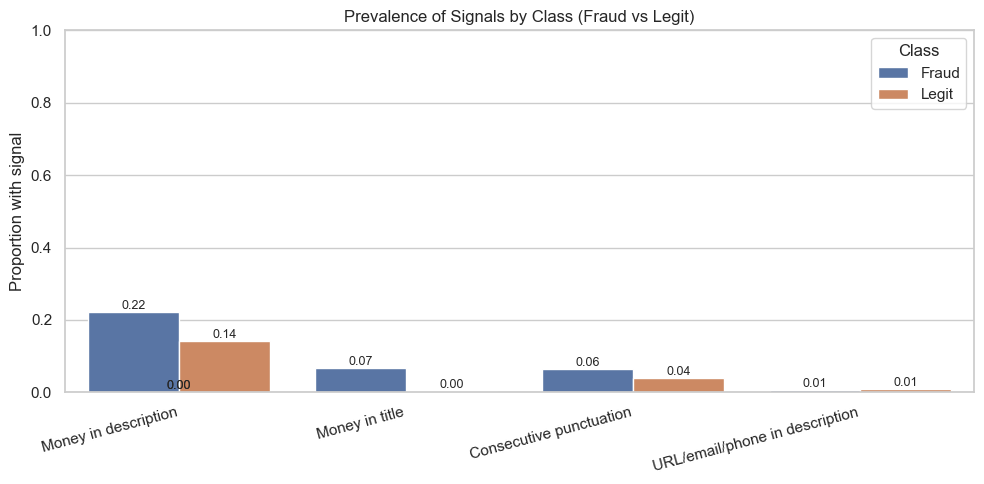

In [ ]:
# Map fraud label to 0/1 and to text labels
fraud_bin = recruitment_df["fraudulent"].map({'t':1,'f':0}).astype(int)
fraud_lbl = fraud_bin.replace({1:"Fraud", 0:"Legit"})
recruitment_df["fraud_bin"]  = fraud_bin
recruitment_df["fraud_label"] = fraud_lbl

# Compute proportions for each signal by class
signals = {
    "consecutive_punct": "Consecutive punctuation",
    "money_in_desc":     "Money in description",
    "money_in_title":    "Money in title",
    "url_in_description":       "URL/email/phone in description"
}

rows = []
for col, pretty in signals.items():
    grp = recruitment_df.groupby("fraud_label")[col].mean()
    for cls, prop in grp.items():
        rows.append({"Signal": pretty, "Class": cls, "Proportion": prop})
prop_df = pd.DataFrame(rows)

# Sort signals by Fraud proportion
order = (prop_df[prop_df["Class"]=="Fraud"]
         .sort_values("Proportion", ascending=False)["Signal"].tolist())
prop_df["Signal"] = pd.Categorical(prop_df["Signal"], categories=order, ordered=True)

# Plot grouped bar chart with proportions (0–1) and labels
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.barplot(data=prop_df, x="Signal", y="Proportion", hue="Class")
ax.set_ylim(0, 1)
ax.set_xlabel("")
ax.set_ylabel("Proportion with signal")
ax.set_title("Prevalence of Signals by Class (Fraud vs Legit)")
plt.xticks(rotation=15, ha="right")

# Add value labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}",
                (p.get_x() + p.get_width()/2., height),
                ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

Here we see that fraudulent job advertisements seem to have higher proportion of advertisements with money in description and title, together with consecutive punctuations. These features might be useful in providing discriminatory power for identifying fraudulent job advertisements. 

We then look into the length of the stripped company profile, description, requirements (`company_profile_stripped_len`, `description_stripped_len`, `requirements_stripped_len`) since fraudulent job advertisements are likely to have shorter job advertisements due to their vague requirements and lack of an associated/established company profile.

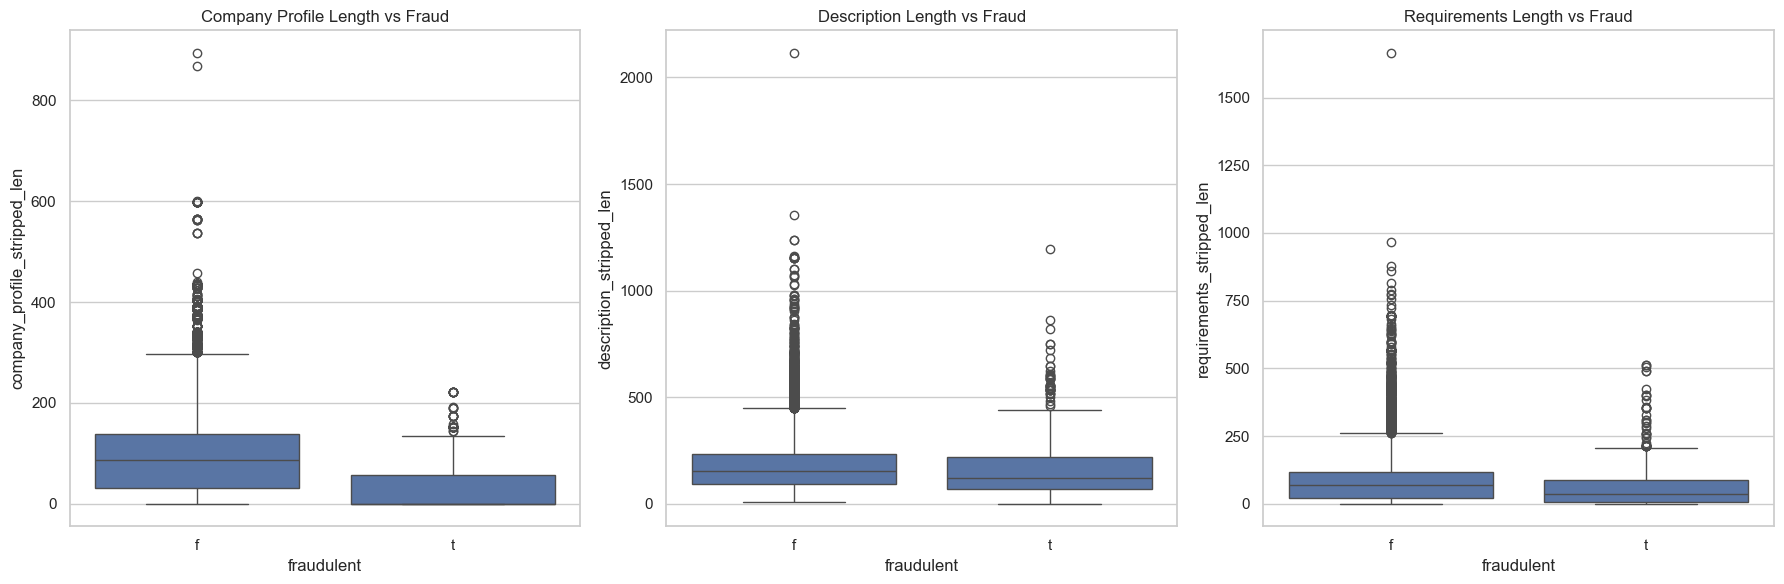

In [ ]:
# Compute lengths
recruitment_df['company_profile_stripped_len'] = recruitment_df['company_profile_stripped'].fillna('').str.split().str.len()
recruitment_df['description_stripped_len'] = recruitment_df['description_stripped'].fillna('').str.split().str.len()
recruitment_df['requirements_stripped_len'] = recruitment_df['requirements_stripped'].fillna('').str.split().str.len()

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot: company_profile
sns.boxplot(x='fraudulent', y='company_profile_stripped_len', data=recruitment_df, ax=axes[0])
axes[0].set_title("Company Profile Length vs Fraud")

# Boxplot: description
sns.boxplot(x='fraudulent', y='description_stripped_len', data=recruitment_df, ax=axes[1])
axes[1].set_title("Description Length vs Fraud")

# Boxplot: requirements
sns.boxplot(x='fraudulent', y='requirements_stripped_len', data=recruitment_df, ax=axes[2])
axes[2].set_title("Requirements Length vs Fraud")

plt.tight_layout()
plt.show()

We clip extreme lengths (those at the 99th percentile) to make it easier to visualise the differences in the median length of company profile, description and requirements. We then create summary statistics tables.

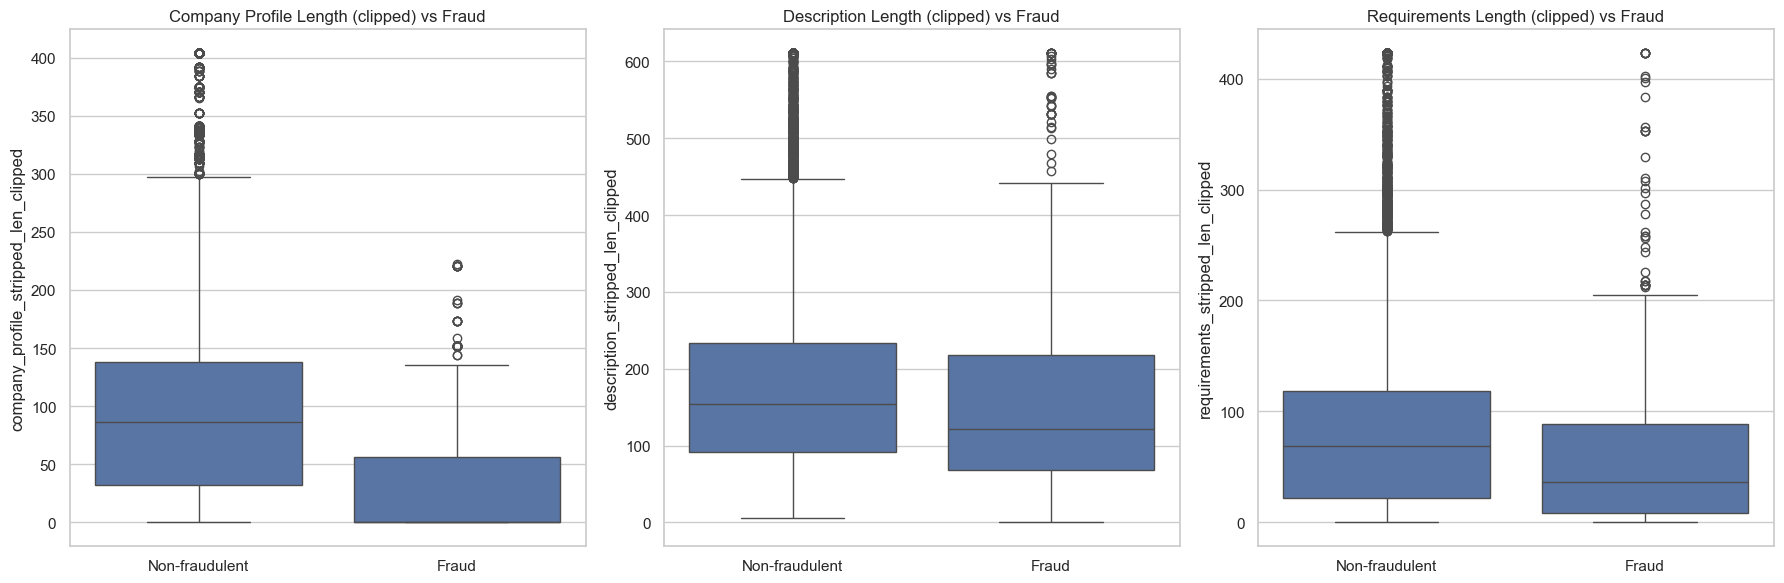


Company Profile Length (words):
                   Q1  Median     Q3
fraud_label                        
Fraud            0.0     0.0   56.0
Non-fraudulent  32.0    86.0  138.0

Description Length (words):
                   Q1  Median     Q3
fraud_label                        
Fraud           68.0   121.0  218.0
Non-fraudulent  92.0   154.0  234.0

Requirements Length (words):
                   Q1  Median     Q3
fraud_label                        
Fraud            8.0    36.0   89.0
Non-fraudulent  22.0    69.0  118.0


In [ ]:
# Clip extreme lengths at the 99th percentile
len_cols = ['company_profile_stripped_len', 'description_stripped_len', 'requirements_stripped_len']
for c in len_cols:
    cap = recruitment_df[c].quantile(0.99)
    recruitment_df[c+'_clipped'] = recruitment_df[c].clip(upper=cap)

fraud_map = {'t':'Fraud', 'f':'Non-fraudulent', 1:'Fraud', 0:'Non-fraudulent'}
fraud_label = recruitment_df['fraudulent'].map(fraud_map).fillna(recruitment_df['fraudulent'])

# Boxplots with clipped values
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x=fraud_label, y='company_profile_stripped_len_clipped', data=recruitment_df, ax=axes[0])
axes[0].set_title("Company Profile Length (clipped) vs Fraud"); axes[0].set_xlabel("")

sns.boxplot(x=fraud_label, y='description_stripped_len_clipped', data=recruitment_df, ax=axes[1])
axes[1].set_title("Description Length (clipped) vs Fraud"); axes[1].set_xlabel("")

sns.boxplot(x=fraud_label, y='requirements_stripped_len_clipped', data=recruitment_df, ax=axes[2])
axes[2].set_title("Requirements Length (clipped) vs Fraud"); axes[2].set_xlabel("")

plt.tight_layout()
plt.show()

# Summary tables
def quantile_table(df, var, cls):
    tbl = (df.groupby(cls)[var]
             .quantile([0.25, 0.50, 0.75])
             .unstack(level=1)
             .rename(columns={0.25:'Q1', 0.50:'Median', 0.75:'Q3'}))
    return tbl.round(1)

# Use the same class labels used in the plots
recruitment_df['fraud_label'] = fraud_label

summary_company = quantile_table(recruitment_df, 'company_profile_stripped_len', 'fraud_label')
summary_desc    = quantile_table(recruitment_df, 'description_stripped_len',      'fraud_label')
summary_reqs    = quantile_table(recruitment_df, 'requirements_stripped_len',     'fraud_label')

print("\nCompany Profile Length (words):\n", summary_company)
print("\nDescription Length (words):\n", summary_desc)
print("\nRequirements Length (words):\n", summary_reqs)

From these box plots and referring to the summary statistics table, we can clearly see that non-fraudulent job advertisements have a longer company profile, job description and job requirements than fraudulent job descriptions. These signal that these features - `company_profile`, `description` and `requirements` might be useful features in helping to identify fraudulent job advertisements.

Other than structured features and empirical rules, there might be other underlying patterns in the job advertisement's description as well. We explore this using Term Frequency-Inverse Document Frequency. We convert all text to lowercase and remove common english stopwords. 

In [ ]:
def calculate_tfidf_scores(text_data, max_features=20, stop_words='english', ngram_range=(1,1)):
    # Create TF-IDF vectorizer
    vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=max_features, ngram_range=ngram_range)
    X = vectorizer.fit_transform(text_data)
    
    # Determine column name based on ngram_range
    feature_col_name = 'ngram' if ngram_range != (1,1) else 'word'
    
    # Get feature names and mean TF-IDF scores
    tfidf_scores = pd.DataFrame({
        feature_col_name: vectorizer.get_feature_names_out(),
        'tfidf_score': X.mean(axis=0).A1
    }).sort_values(by='tfidf_score', ascending=False)
    
    return tfidf_scores

def analyze_tfidf_by_fraud_status(df, text_col='composite_text', target_col='fraudulent', 
                                 fraud_value='t', non_fraud_value='f', max_features=20, 
                                 ngram_range=(1,1), print_results=True):
    # Subset fraudulent descriptions
    fraud_descriptions = df[df[target_col] == fraud_value][text_col].dropna()
    fraud_tfidf_scores = calculate_tfidf_scores(fraud_descriptions, max_features, ngram_range=ngram_range)
    
    # Subset non-fraudulent descriptions
    non_fraud_descriptions = df[df[target_col] == non_fraud_value][text_col].dropna()
    non_fraud_tfidf_scores = calculate_tfidf_scores(non_fraud_descriptions, max_features, ngram_range=ngram_range)
    
    if print_results:
        print("=== Fraudulent Job Postings - Top TF-IDF Scores ===")
        print(fraud_tfidf_scores)
        print("\n=== Non-Fraudulent Job Postings - Top TF-IDF Scores ===")
        print(non_fraud_tfidf_scores)
    
    return fraud_tfidf_scores, non_fraud_tfidf_scores

In [66]:
fraud_scores, non_fraud_scores = analyze_tfidf_by_fraud_status(recruitment_df)

=== Fraudulent Job Postings - Top TF-IDF Scores ===
           word  tfidf_score
18         work     0.219038
7    experience     0.200434
15       skills     0.171078
17         time     0.148326
2       company     0.129121
13      service     0.126543
4          data     0.126141
10     position     0.123387
3      customer     0.121092
0       ability     0.116318
16         team     0.115360
1      business     0.113718
12     required     0.101914
9    management     0.101670
14     services     0.096923
6   environment     0.089228
19        years     0.084467
8      industry     0.080529
5   engineering     0.079619
11      project     0.071589

=== Non-Fraudulent Job Postings - Top TF-IDF Scores ===
           word  tfidf_score
6    experience     0.259508
17         work     0.195049
15         team     0.176829
2       company     0.133680
14       skills     0.132070
1      business     0.128463
16         time     0.114880
9           new     0.114387
3      customer     0

The TF-IDF scores of high-frequency words in fraudulent and non-fraudulent share a lot of generic business/job vocabulary (e.g. work, experience, skills etc.). We look into N-grams/multi-word phrases instead. 

In [67]:
fraud_ngrams, non_fraud_ngrams = analyze_tfidf_by_fraud_status(
    recruitment_df, 
    ngram_range=(2,3), 
    max_features=20
)

=== Fraudulent Job Postings - Top TF-IDF Scores ===
                       ngram  tfidf_score
6           customer service     0.135537
7                 data entry     0.122248
5       communication skills     0.107274
18                 work home     0.085337
8        experience required     0.082136
0               ability work     0.079985
19          years experience     0.073665
1                  able work     0.059453
10               high school     0.056154
4          aptitude staffing     0.049226
16             signing bonus     0.048041
12                   oil gas     0.046232
15            school diploma     0.046042
11       high school diploma     0.045879
2   administrative assistant     0.045533
14        project management     0.044693
17            skills ability     0.043617
3             aker solutions     0.037135
9               gas industry     0.030189
13          oil gas industry     0.030189

=== Non-Fraudulent Job Postings - Top TF-IDF Scores ===
         

Across both fraudulent and non-fraudulent job advertisements, it is difficult to distinguish fraudulent advertisements from non-fraudulent advertisements through observing the raw TF-IDF scores alone, even for N-grams. However, TF-IDF may still capture subtle patterns in a higher dimensional space and together with the structured features and rule-based features, will serve as features for the baseline logistic regression model.

In [68]:
recruitment_df.to_csv('recruitment_df_processed.csv', index=False)